<a href="https://colab.research.google.com/github/InDataSight/pysparkexamples/blob/main/PySparkPriceComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal is to compare different prices for the same component. Demonstrating the base logic what is process, what kind of data are being used. Also practice the pyspark basics.

Note: All data used are publicly available. Price moves are dummy, to demostrate the price moves.

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq
!wget -q https://archive.apache.org/dist/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3-scala2.13.tgz
!tar xf spark-3.5.3-bin-hadoop3-scala2.13.tgz
!pip install -q findspark
!pip install pyspark

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Fetched 4,225 kB in 6s (756 kB/s)
Reading packag

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, col, expr

spark = SparkSession.builder.appName("PriceComparison").getOrCreate()

In [3]:
spark

In [4]:
#https://www.dell.com/en-us/shop/memory-upgrades/ar/8134/32gb?appliedRefinements=728
#https://www.dell.com/en-us/shop/servers-storage-and-networking/poweredge-r660-rack-server/spd/poweredge-r660/pe_r660_vi_vp_sb_deals
#https://www.dell.com/en-us/shop/memory-upgrades/ar/8134/3200mhz-and-above?appliedRefinements=32720,1311,728
#https://www.cdw.com/search/servers-server-management/server-components/server-memory/?w=SA2&b=DLE&filter=af_rf_memory_memory_speed_ss%3a(%224800+megahertz%22)&filterClicked=Memory%20Speed
#https://www.cdw.com/search/servers-server-management/server-components/server-memory/?lfr=1&w=SA2&key=P43328-B21
#

In [5]:
products_data = [
    {
        "PartNo": "P43328-B21",
        "description": "HPE 32GB (1x32GB) Dual Rank x8 DDR5-4800 CAS-40-39-39 EC8 Registered Smart Memory Kit",
        "company": "HPE"
    },
    {
        "PartNo": "AC830717",
        "description": "Dell Memory Upgrade - 32 GB - 2Rx8 DDR5 RDIMM 5600 MT/s (Not Compatible with 4800 MT/s DIMMs)",
        "company": "DELLUpgrades"
    },
    {
        "PartNo": "370-12345",
        "description": "32GB RDIMM, 5600MT/s, Dual Rank",
        "company": "DELLServer"
    },
    {
        "PartNo": "P64706-B21",
        "description": "HPE 32GB (1x32GB) Dual Rank x8 DDR5-5600 CAS-46-45-45 EC8 Registered Smart Memory Kit",
        "company": "HPE"
    },
    {
        "PartNo": "AC239378",
        "description": "Dell Memory Upgrade - 32 GB - 2Rx8 DDR5 RDIMM 4800 MT/s (Not Compatible with 5600 MT/s DIMMs)",
        "company": "DELLUpgrades"
    },
    {
        "PartNo": "370-12344",
        "description": "32GB RDIMM, 4800MT/s, Dual Rank",
        "company": "DELLServer"
    },
]

products_df = spark.createDataFrame(products_data)
products_df.show(truncate=False)

+----------+------------+---------------------------------------------------------------------------------------------+
|PartNo    |company     |description                                                                                  |
+----------+------------+---------------------------------------------------------------------------------------------+
|P43328-B21|HPE         |HPE 32GB (1x32GB) Dual Rank x8 DDR5-4800 CAS-40-39-39 EC8 Registered Smart Memory Kit        |
|AC830717  |DELLUpgrades|Dell Memory Upgrade - 32 GB - 2Rx8 DDR5 RDIMM 5600 MT/s (Not Compatible with 4800 MT/s DIMMs)|
|370-12345 |DELLServer  |32GB RDIMM, 5600MT/s, Dual Rank                                                              |
|P64706-B21|HPE         |HPE 32GB (1x32GB) Dual Rank x8 DDR5-5600 CAS-46-45-45 EC8 Registered Smart Memory Kit        |
|AC239378  |DELLUpgrades|Dell Memory Upgrade - 32 GB - 2Rx8 DDR5 RDIMM 4800 MT/s (Not Compatible with 5600 MT/s DIMMs)|
|370-12344 |DELLServer  |32GB RDIMM, 480

In [6]:
attributes_data = [
    {"PartNo": "P43328-B21", "capacity": "32GB", "speed": "4800MTs", "rank": "DualRank", "technology": "RDIMM"},
    {"PartNo": "P64706-B21", "capacity": "32GB", "speed": "5600MTs", "rank": "DualRank", "technology": "RDIMM"},
    {"PartNo": "AC830717", "capacity": "32GB", "speed": "5600MTs", "rank": "DualRank", "technology": "RDIMM"},
    {"PartNo": "370-12345", "capacity": "32GB", "speed": "5600MTs", "rank": "DualRank", "technology": "RDIMM"},
    {"PartNo": "370-12344", "capacity": "32GB", "speed": "4800MTs", "rank": "DualRank", "technology": "RDIMM"},
    {"PartNo": "AC239378", "capacity": "32GB", "speed": "4800MTs", "rank": "DualRank", "technology": "RDIMM"}

]

attributes_df = spark.createDataFrame(attributes_data)
attributes_df.show(truncate=False)

+----------+--------+--------+-------+----------+
|PartNo    |capacity|rank    |speed  |technology|
+----------+--------+--------+-------+----------+
|P43328-B21|32GB    |DualRank|4800MTs|RDIMM     |
|P64706-B21|32GB    |DualRank|5600MTs|RDIMM     |
|AC830717  |32GB    |DualRank|5600MTs|RDIMM     |
|370-12345 |32GB    |DualRank|5600MTs|RDIMM     |
|370-12344 |32GB    |DualRank|4800MTs|RDIMM     |
|AC239378  |32GB    |DualRank|4800MTs|RDIMM     |
+----------+--------+--------+-------+----------+



In [7]:
price_adjustments_data = [
    {"date": "2024-09-01", "adjustment_factor": -0.05},  # -5%
    {"date": "2024-10-01", "adjustment_factor": 0.00},   # baseline (0%)
    {"date": "2024-11-01", "adjustment_factor": 0.07}    # +7%
]

adjustments_df = spark.createDataFrame(price_adjustments_data)
adjustments_df.show()


+-----------------+----------+
|adjustment_factor|      date|
+-----------------+----------+
|            -0.05|2024-09-01|
|              0.0|2024-10-01|
|             0.07|2024-11-01|
+-----------------+----------+



In [8]:
base_prices_data = [
    {"PartNo": "P43328-B21", "date": "2024-10-01", "list_price": 2498.00, "cdw_price": 615.99},
    {"PartNo": "AC830717", "date": "2024-10-01", "list_price": 1344.91, "cdw_price": None},
    {"PartNo": "370-12345", "date": "2024-10-01", "list_price": 1399.28, "cdw_price": None},
    {"PartNo": "P64706-B21", "date": "2024-10-01", "list_price": 2498.00, "cdw_price": 615.99},
    {"PartNo": "AC239378", "date": "2024-10-01", "list_price": 1151.86, "cdw_price": 825.99},
    {"PartNo": "370-12344", "date": "2024-10-01", "list_price": 1399.28, "cdw_price": None}


]

base_prices_df = spark.createDataFrame(base_prices_data)
base_prices_df.show()


+----------+---------+----------+----------+
|    PartNo|cdw_price|      date|list_price|
+----------+---------+----------+----------+
|P43328-B21|   615.99|2024-10-01|    2498.0|
|  AC830717|     NULL|2024-10-01|   1344.91|
| 370-12345|     NULL|2024-10-01|   1399.28|
|P64706-B21|   615.99|2024-10-01|    2498.0|
|  AC239378|   825.99|2024-10-01|   1151.86|
| 370-12344|     NULL|2024-10-01|   1399.28|
+----------+---------+----------+----------+



In [9]:
base_prices_data = [
    {"PartNo": "P43328-B21", "date": "2024-10-01", "list_price": 2498.00, "cdw_price": 615.99},
    {"PartNo": "AC830717", "date": "2024-10-01", "list_price": 1344.91, "cdw_price": None},
    {"PartNo": "370-12345", "date": "2024-10-01", "list_price": 1399.28, "cdw_price": None},
    {"PartNo": "P64706-B21", "date": "2024-10-01", "list_price": 2498.00, "cdw_price": 615.99},
    {"PartNo": "AC239378", "date": "2024-10-01", "list_price": 1151.86, "cdw_price": 825.99},
    {"PartNo": "370-12344", "date": "2024-10-01", "list_price": 1399.28, "cdw_price": None}
]

base_prices_df = spark.createDataFrame(base_prices_data)
base_prices_df.show()


+----------+---------+----------+----------+
|    PartNo|cdw_price|      date|list_price|
+----------+---------+----------+----------+
|P43328-B21|   615.99|2024-10-01|    2498.0|
|  AC830717|     NULL|2024-10-01|   1344.91|
| 370-12345|     NULL|2024-10-01|   1399.28|
|P64706-B21|   615.99|2024-10-01|    2498.0|
|  AC239378|   825.99|2024-10-01|   1151.86|
| 370-12344|     NULL|2024-10-01|   1399.28|
+----------+---------+----------+----------+



In [10]:
from pyspark.sql.functions import concat_ws,col

product_details_df = products_df.join(attributes_df, on="PartNo", how="inner")

key_columns = ["company", "capacity", "rank", "speed", "technology"]

product_details_df = product_details_df.withColumn(
    "key",
    concat_ws("", *[col(c) for c in key_columns])
)

product_details_df.orderBy(col("company"), col("speed")).show(truncate=False)

+----------+------------+---------------------------------------------------------------------------------------------+--------+--------+-------+----------+------------------------------------+
|PartNo    |company     |description                                                                                  |capacity|rank    |speed  |technology|key                                 |
+----------+------------+---------------------------------------------------------------------------------------------+--------+--------+-------+----------+------------------------------------+
|370-12344 |DELLServer  |32GB RDIMM, 4800MT/s, Dual Rank                                                              |32GB    |DualRank|4800MTs|RDIMM     |DELLServer32GBDualRank4800MTsRDIMM  |
|370-12345 |DELLServer  |32GB RDIMM, 5600MT/s, Dual Rank                                                              |32GB    |DualRank|5600MTs|RDIMM     |DELLServer32GBDualRank5600MTsRDIMM  |
|AC239378  |DELLUpgrades|Dell 

In [11]:
from pyspark.sql.functions import round

# Let's say we want to look at prices on 3 different dates:
analysis_dates = [
    {"PartNo": "P43328-B21", "analysis_date": "2024-09-01"},
    {"PartNo": "P43328-B21", "analysis_date": "2024-10-01"},
    {"PartNo": "P43328-B21", "analysis_date": "2024-11-01"},

    {"PartNo": "AC830717", "analysis_date": "2024-09-01"},
    {"PartNo": "AC830717", "analysis_date": "2024-10-01"},
    {"PartNo": "AC830717", "analysis_date": "2024-11-01"},

    {"PartNo": "370-12345", "analysis_date": "2024-09-01"},
    {"PartNo": "370-12345", "analysis_date": "2024-10-01"},
    {"PartNo": "370-12345", "analysis_date": "2024-11-01"},

    {"PartNo": "P64706-B21", "analysis_date": "2024-09-01"},
    {"PartNo": "P64706-B21", "analysis_date": "2024-10-01"},
    {"PartNo": "P64706-B21", "analysis_date": "2024-11-01"},

    {"PartNo": "AC239378", "analysis_date": "2024-09-01"},
    {"PartNo": "AC239378", "analysis_date": "2024-10-01"},
    {"PartNo": "AC239378", "analysis_date": "2024-11-01"},

    {"PartNo": "370-12344", "analysis_date": "2024-09-01"},
    {"PartNo": "370-12344", "analysis_date": "2024-10-01"},
    {"PartNo": "370-12344", "analysis_date": "2024-11-01"},
]

analysis_dates_df = spark.createDataFrame(analysis_dates)

# Join analysis_dates_df to base_prices_df to get baseline prices
# Then join adjustments_df to get the adjustment factor for the analysis_date
result_df = (
    analysis_dates_df
    # Join with base prices on PartNo, but the base price date is fixed (2024-10-01)
    .join(base_prices_df, on="PartNo", how="left")
    # Join adjustments on the analysis_date
    .join(adjustments_df, analysis_dates_df["analysis_date"] == adjustments_df["date"], how="left")
    # Now we apply the (1 + adjustment_factor) to the base price
    # Since baseline date = 2024-10-01, we consider that date's price as the reference
    # If analysis_date == 2024-10-01, factor = 1 + 0.00 = 1.00 (no change)
    # If analysis_date == 2024-09-01, factor = 1 - 0.05 = 0.95
    # If analysis_date == 2024-11-01, factor = 1 + 0.07 = 1.07
    .withColumn("final_list_price", round(col("list_price") * (1 + col("adjustment_factor")), 2))
    .withColumn("final_cdw_price",
                expr("CASE WHEN cdw_price IS NOT NULL THEN round(cdw_price * (1 + adjustment_factor), 2) ELSE NULL END"))
    .select("PartNo", "analysis_date", "list_price", "cdw_price", "adjustment_factor", "final_list_price", "final_cdw_price")
)

result_df.show(truncate=False)


+----------+-------------+----------+---------+-----------------+----------------+---------------+
|PartNo    |analysis_date|list_price|cdw_price|adjustment_factor|final_list_price|final_cdw_price|
+----------+-------------+----------+---------+-----------------+----------------+---------------+
|AC830717  |2024-09-01   |1344.91   |NULL     |-0.05            |1277.66         |NULL           |
|AC830717  |2024-10-01   |1344.91   |NULL     |0.0              |1344.91         |NULL           |
|AC830717  |2024-11-01   |1344.91   |NULL     |0.07             |1439.05         |NULL           |
|P43328-B21|2024-09-01   |2498.0    |615.99   |-0.05            |2373.1          |585.19         |
|P43328-B21|2024-10-01   |2498.0    |615.99   |0.0              |2498.0          |615.99         |
|P43328-B21|2024-11-01   |2498.0    |615.99   |0.07             |2672.86         |659.11         |
|370-12345 |2024-09-01   |1399.28   |NULL     |-0.05            |1329.32         |NULL           |
|370-12345

In [12]:
from pyspark.sql.functions import col, expr

# Extract HPE reference prices
hpe_prices_df = (
    result_df
    .filter(col("PartNo") == "P43328-B21")  # HPE product
    .select(
        col("analysis_date").alias("ref_date"),
        col("final_list_price").alias("hpe_final_list_price"),
        col("final_cdw_price").alias("hpe_final_cdw_price")
    )
)

# Extract Dell Server reference price (370-12345)
dell_server_prices_df = (
    result_df
    .filter(col("PartNo") == "370-12345")  # Dell Server product
    .select(
        col("analysis_date").alias("ref_date"),
        col("final_list_price").alias("dell_server_list_price")
    )
)

# Extract Dell Upgrades price (AC830717)
dell_upgrades_df = (
    result_df
    .filter(col("PartNo") == "AC830717")  # Dell Upgrades product
    .select(
        col("analysis_date"),
        col("final_list_price").alias("dell_upgrades_list_price")
    )
)

# Join Dell Upgrades with HPE references and Dell Server references by analysis_date
comparison_df = (
    dell_upgrades_df
    .join(hpe_prices_df, dell_upgrades_df["analysis_date"] == hpe_prices_df["ref_date"], how="left")
    .join(dell_server_prices_df, dell_upgrades_df["analysis_date"] == dell_server_prices_df["ref_date"], how="left")
    .select(
        dell_upgrades_df["analysis_date"],
        "dell_upgrades_list_price",
        "hpe_final_list_price",
        "hpe_final_cdw_price",
        "dell_server_list_price"
    )
    # Calculate the requested ratios
    .withColumn("ratio_dell_upgrades_vs_dell_server", expr("dell_upgrades_list_price / dell_server_list_price"))
    .withColumn("ratio_dell_upgrades_vs_hpe", expr("dell_upgrades_list_price / hpe_final_list_price"))
    .withColumn("ratio_dell_upgrades_vs_cdw", expr("dell_upgrades_list_price / hpe_final_cdw_price"))
)

comparison_df.show(truncate=False)


+-------------+------------------------+--------------------+-------------------+----------------------+----------------------------------+--------------------------+--------------------------+
|analysis_date|dell_upgrades_list_price|hpe_final_list_price|hpe_final_cdw_price|dell_server_list_price|ratio_dell_upgrades_vs_dell_server|ratio_dell_upgrades_vs_hpe|ratio_dell_upgrades_vs_cdw|
+-------------+------------------------+--------------------+-------------------+----------------------+----------------------------------+--------------------------+--------------------------+
|2024-09-01   |1277.66                 |2373.1              |585.19             |1329.32               |0.9611380254566245                |0.5383928195187729        |2.1833250739076195        |
|2024-10-01   |1344.91                 |2498.0              |615.99             |1399.28               |0.9611443027842892                |0.5383947157726181        |2.1833308982288675        |
|2024-11-01   |1439.05        

New aproach, to match parameters, more complex scenario.

In [13]:
from pyspark.sql.functions import col, expr

# Assume we already have:
# products_df, attributes_df, base_prices_df, adjustments_df, analysis_dates_df
# and a final result_df with final_list_price and final_cdw_price after applying date-based adjustments.

# 1. Enrich result_df with attributes and product company
enriched_df = (
    result_df
    .join(attributes_df, on="PartNo", how="left")       # Add capacity, speed, rank, technology
    .join(products_df, on="PartNo", how="left")         # Add company, description
    .select(
        "PartNo",
        "company",
        "capacity",
        "speed",
        "rank",
        "technology",
        "analysis_date",
        "final_list_price",
        "final_cdw_price"
    )
)

# Now we have a DataFrame that includes company and attributes for each product at each analysis_date.

# 2. Create separate DataFrames for each company category:
hpe_df = (
    enriched_df
    .filter(col("company") == "HPE")
    .select("capacity", "speed", "rank", "technology", "analysis_date",
            col("final_list_price").alias("hpe_final_list_price"),
            col("final_cdw_price").alias("hpe_final_cdw_price"))
)

dell_server_df = (
    enriched_df
    .filter(col("company") == "DELLServer")
    .select("capacity", "speed", "rank", "technology", "analysis_date",
            col("final_list_price").alias("dell_server_list_price"))
)

dell_upgrades_df = (
    enriched_df
    .filter(col("company") == "DELLUpgrades")
    .select("capacity", "speed", "rank", "technology", "analysis_date",
            col("final_list_price").alias("dell_upgrades_list_price"))
)

# 3. Join these three DataFrames on the attribute set plus the analysis_date
comparison_df = (
    dell_upgrades_df
    .join(hpe_df, on=["capacity", "speed", "rank", "technology", "analysis_date"], how="left")
    .join(dell_server_df, on=["capacity", "speed", "rank", "technology", "analysis_date"], how="left")
    .select(
        "capacity", "speed", "rank", "technology", "analysis_date",
        "dell_upgrades_list_price",
        "hpe_final_list_price",
        "hpe_final_cdw_price",
        "dell_server_list_price"
    )
    # Calculate ratios based on the matched attributes
    .withColumn("ratio_dell_upgrades_vs_dell_server", expr("dell_upgrades_list_price / dell_server_list_price"))
    .withColumn("ratio_dell_upgrades_vs_hpe", expr("dell_upgrades_list_price / hpe_final_list_price"))
    .withColumn("ratio_dell_upgrades_vs_cdw", expr("dell_upgrades_list_price / hpe_final_cdw_price"))
)

comparison_df.show(truncate=False)


+--------+-------+--------+----------+-------------+------------------------+--------------------+-------------------+----------------------+----------------------------------+--------------------------+--------------------------+
|capacity|speed  |rank    |technology|analysis_date|dell_upgrades_list_price|hpe_final_list_price|hpe_final_cdw_price|dell_server_list_price|ratio_dell_upgrades_vs_dell_server|ratio_dell_upgrades_vs_hpe|ratio_dell_upgrades_vs_cdw|
+--------+-------+--------+----------+-------------+------------------------+--------------------+-------------------+----------------------+----------------------------------+--------------------------+--------------------------+
|32GB    |5600MTs|DualRank|RDIMM     |2024-10-01   |1344.91                 |2498.0              |615.99             |1399.28               |0.9611443027842892                |0.5383947157726181        |2.1833308982288675        |
|32GB    |4800MTs|DualRank|RDIMM     |2024-09-01   |1094.27                 

In [14]:
comparison_df.printSchema()

root
 |-- capacity: string (nullable = true)
 |-- speed: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- technology: string (nullable = true)
 |-- analysis_date: string (nullable = true)
 |-- dell_upgrades_list_price: double (nullable = true)
 |-- hpe_final_list_price: double (nullable = true)
 |-- hpe_final_cdw_price: double (nullable = true)
 |-- dell_server_list_price: double (nullable = true)
 |-- ratio_dell_upgrades_vs_dell_server: double (nullable = true)
 |-- ratio_dell_upgrades_vs_hpe: double (nullable = true)
 |-- ratio_dell_upgrades_vs_cdw: double (nullable = true)



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import to_date

# If analysis_date is a string, make sure it's properly parsed to a date in Spark:
# (If it's already a proper date type, you can skip this step)
comparison_df = comparison_df.withColumn("analysis_date", to_date("analysis_date", "yyyy-MM-dd"))

# Convert to Pandas DataFrame
pdf = comparison_df.select("analysis_date", "dell_upgrades_list_price", "dell_server_list_price").toPandas()

# Ensure that analysis_date is a datetime in Pandas (if needed)
pdf["analysis_date"] = pd.to_datetime(pdf["analysis_date"])

pdf


,analysis_date,dell_upgrades_list_price,dell_server_list_price
0,2024-10-01,1344.91,1399.28
1,2024-09-01,1094.27,1329.32
2,2024-11-01,1439.05,1497.23
3,2024-09-01,1277.66,1329.32
4,2024-10-01,1151.86,1399.28
5,2024-11-01,1232.49,1497.23


In [16]:
# Set the 'analysis_date' as the index if desired (not mandatory)
pdf.set_index("analysis_date", inplace=True)

pdf

,dell_upgrades_list_price,dell_server_list_price
analysis_date,,
2024-10-01,1344.91,1399.28
2024-09-01,1094.27,1329.32
2024-11-01,1439.05,1497.23
2024-09-01,1277.66,1329.32
2024-10-01,1151.86,1399.28
2024-11-01,1232.49,1497.23


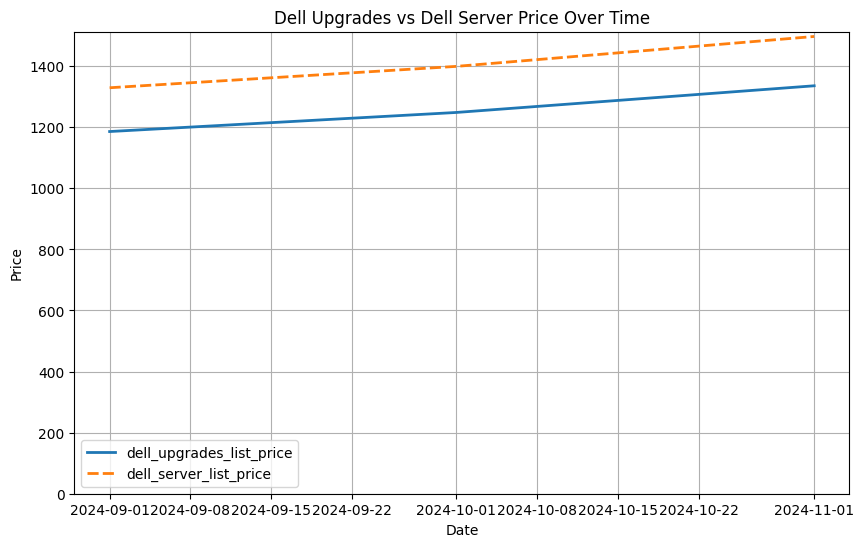

In [17]:
# Plot using seaborn or matplotlib
plt.figure(figsize=(10,6))
sns.lineplot(data=pdf[["dell_upgrades_list_price", "dell_server_list_price"]], errorbar=None, linewidth=2.0)


# Start y-axis from zero
plt.ylim(0, None)

plt.title("Dell Upgrades vs Dell Server Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

<ipython-input-18-411e0e1155d5>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pdf, x="analysis_date", y="dell_upgrades_list_price", ci=None, estimator=None, marker='o', label="Dell Upgrades")
<ipython-input-18-411e0e1155d5>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pdf, x="analysis_date", y="dell_server_list_price", ci=None, estimator=None, marker='o', label="Dell Server")


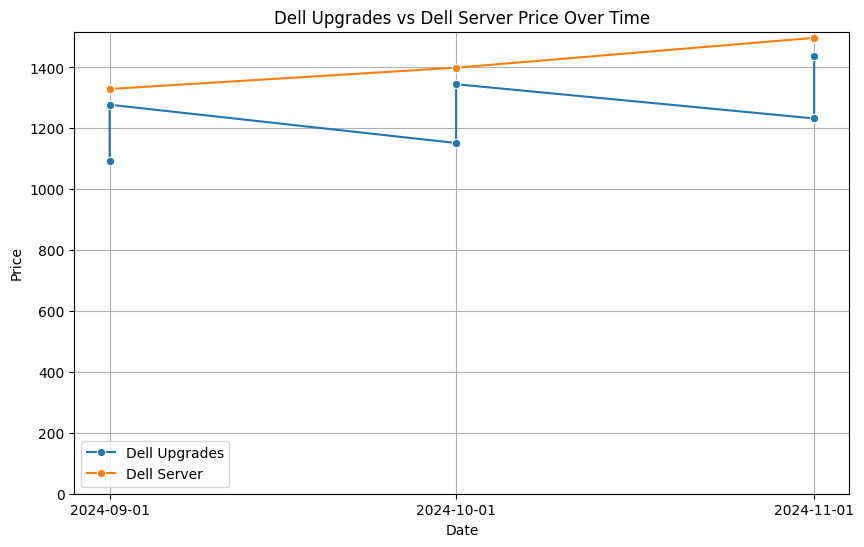

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If analysis_date is a string, make sure it's properly parsed to a date in Spark:
# (If it's already a proper date type, you can skip this step)
comparison_df = comparison_df.withColumn("analysis_date", to_date("analysis_date", "yyyy-MM-dd"))

# Convert to Pandas DataFrame
pdf = comparison_df.select("analysis_date", "dell_upgrades_list_price", "dell_server_list_price").toPandas()

# Suppose pdf is your Pandas DataFrame with columns "analysis_date", "dell_upgrades_list_price", and "dell_server_list_price"
pdf["analysis_date"] = pd.to_datetime(pdf["analysis_date"])

plt.figure(figsize=(10,6))

# Plot without aggregation, no confidence interval, and show points
sns.lineplot(data=pdf, x="analysis_date", y="dell_upgrades_list_price", ci=None, estimator=None, marker='o', label="Dell Upgrades")
sns.lineplot(data=pdf, x="analysis_date", y="dell_server_list_price", ci=None, estimator=None, marker='o', label="Dell Server")

# Format the x-axis to show only the given dates
unique_dates = pdf["analysis_date"].unique()
plt.xticks(unique_dates, [d.strftime("%Y-%m-%d") for d in unique_dates])

# Start y-axis from zero
plt.ylim(0, None)

plt.title("Dell Upgrades vs Dell Server Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()
